## Challenge Set 3 - Linear Splitting
Topic: Linear Regression with Movies and Train/Test  
Date: 01/27/2016  
Name: Ozzie Liu  

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import numpy as np
import copy
%matplotlib inline

In [2]:
movies = pd.read_csv('2013_movies.csv')

In [53]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [54]:
X = pd.DataFrame()
y = pd.DataFrame()
X['constant'] = [1]*100
y = movies['DomesticTotalGross']

In [5]:
model_1 = sm.OLS(y, X)
fit_1 = model_1.fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 03 Feb 2016   Prob (F-statistic):                nan
Time:                        17:41:26   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
## Find the parameters of the model fit
fit_1.params[0]

100596875.22000003

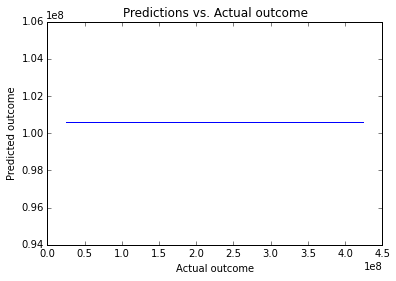

In [55]:
## Use the model to predict the Y results, and plot it against the actual y's
y_predicted = fit_1.predict(X)
y_predicted

plt.plot(y, y_predicted)
plt.title('Predictions vs. Actual outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

In [8]:
residuals = y - fit_1.predict(X)
# residuals

Histogram of residuals


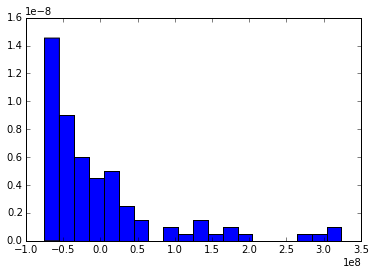

In [48]:
plt.hist(residuals, bins = 20, normed=True)
print "Histogram of residuals"

The results of this least square model with only a constant term basically finds the mean of the Y values. The prediction for all X values are the same - the mean. If we plot the residuals, we see that most residuals are close to 0, because their actual outcomes do lie close to the actual mean. However, there are some outliers that are about 1-3 times higher. These are blockbuster movies that made a lot more money than other movies.

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [56]:
X2 = copy.deepcopy(X)
X2['Budget'] = movies['Budget']
# pd.to_numeric(X)
# Y = movies['DomesticTotalGross']
# plt.plot(X['Budget'],Y, 'ro')

In [58]:
X2

,constant,Budget
0,1,130000000
1,1,200000000
2,1,150000000
3,1,76000000
4,1,225000000
5,1,100000000
6,1,NaN
7,1,NaN
8,1,160000000
9,1,215000000


In [66]:
model = sm.OLS(y, X2, missing = 'drop')
fit2 = model.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 03 Feb 2016   Prob (F-statistic):           6.80e-08
Time:                        22:26:54   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant     4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
y_predicted = fit2.predict(X2)
# y_predicted[~np.isnan(y_predicted)]

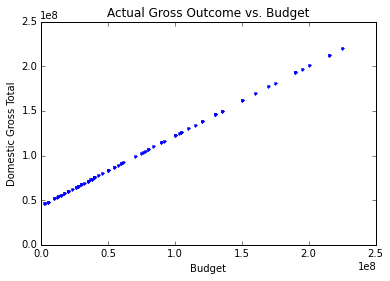

In [68]:
## Plot of predicted gross outcome vs. Budget
plt.plot(X2['Budget'], y_predicted, 'b.')
plt.title('Actual Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross Total')

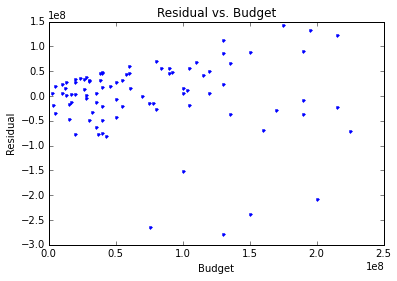

In [69]:
residual = y_predicted - y
## Plot of residuals vs. Budget
plt.plot(X2['Budget'], residual, 'b.')
plt.title('Residual vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Residual')

### Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [59]:
## Drop brudget column and add in rating dummy variables:
X3 = copy.deepcopy(X)

In [79]:
## Make dummy columns
X3['G'] = (movies['Rating'] == 'G').astype(int)
X3['PG'] = (movies['Rating'] == 'PG').astype(int)
X3['PG13'] = (movies['Rating'] == 'PG-13').astype(int)
X3['R'] = (movies['Rating'] == 'R').astype(int)

In [80]:
X3.head()

,constant,G,PG,PG13,R
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,0,1,0


In [82]:
## Create the linear regression
model3 = sm.OLS(y, X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Wed, 03 Feb 2016   Prob (F-statistic):             0.0109
Time:                        22:32:29   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.162e+08   1.77e+07      6.568      0.000      8.11e+07  1.51e+08
G           1.523e+08   6.73e+07      2.265      0.026      1.88e+07  2.86e+08
PG          1.494e+07   2.44e+07      0.613      0.541     -3.34e+07  6.33e+07
PG13       -4.744e+06   2.01e+07     -0.236      0.814     -4.46e+07  3.51e+07
R           -4.63e+07   2.07e+07     -2.241      0.027     -8.73e+07  -5.3e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     1.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.38e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Interpretation is pretty straightforward here. An average movie's domestic gross start around $116,200,000, and G and PG movies could bring in more ticket gross, while PG13 and R would bring less than average.

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [84]:
## Now with the ratings, we add back numerical value production budget and add runtime
X4 = copy.deepcopy(X3)
X4['Budget'] = movies['Budget']
X4['Runtime'] = movies['Runtime']

In [85]:
X4.head()

,constant,G,PG,PG13,R,Budget,Runtime
0,1,0,0,1,0,130000000,146
1,1,0,0,1,0,200000000,129
2,1,0,1,0,0,150000000,108
3,1,0,1,0,0,76000000,98
4,1,0,0,1,0,225000000,143


In [87]:
model4 = sm.OLS(y, X4, missing ='drop')
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Wed, 03 Feb 2016   Prob (F-statistic):           3.77e-06
Time:                        22:38:59   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant   -1.012e+07   4.05e+07     -0.250      0.803     -9.08e+07  7.05e+07
G             -0.0147      0.131     -0.113      0.910        -0.275     0.245
PG          1.438e+07   1.74e+07      0.826      0.411     -2.02e+07   4.9e+07
PG13       -1.342e+07   1.98e+07     -0.677      0.500     -5.28e+07   2.6e+07
R          -1.109e+07   2.03e+07     -0.547      0.586     -5.14e+07  2.92e+07
Budget         0.7036      0.165      4.255      0.000         0.375     1.032
Runtime     6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     2.89e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [91]:
## I'll take the same X4 dataset and divide it randomly with scikit-learn to a 75-25 training-test split
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X4, y, train_size = 0.75)

In [92]:
model5 = sm.OLS(y_train, X_train, missing ='drop')
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     8.493
Date:                Wed, 03 Feb 2016   Prob (F-statistic):           1.57e-05
Time:                        22:57:27   Log-Likelihood:                -1302.0
No. Observations:                  67   AIC:                             2614.
Df Residuals:                      62   BIC:                             2625.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant   -2.164e+06   4.34e+07     -0.050      0.960      -8.9e+07  8.47e+07
G              0.0117      0.749      0.016      0.988        -1.486     1.509
PG         -1.028e+07   1.93e+07     -0.533      0.596     -4.88e+07  2.83e+07
PG13        7.295e+06   2.13e+07      0.342      0.734     -3.54e+07     5e+07
R           8.177e+05   2.15e+07      0.038      0.970     -4.21e+07  4.37e+07
Budget         0.7381      0.172      4.301      0.000         0.395     1.081
Runtime     3.779e+05   5.54e+05      0.682      0.498     -7.29e+05  1.48e+06
==============================================================================
Omnibus:                       26.477   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.554
Skew:                           1.238   Prob(JB):                     7.09e-14
Kurtosis:                       6.944   Cond. No.                     4.17e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
## Now predict on the test set with the training model
y_pred = fit5.predict(X_test)

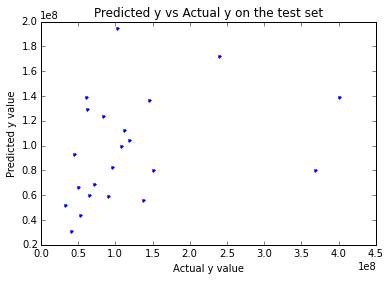

In [101]:
plt.plot(y_test, y_pred, 'b.')
plt.title('Predicted y vs Actual y on the test set')
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')